# A quantitative of the simple RBC model

### Victor Hugo C. Alexandrino da Silva (vhalexs@gmail.com)

This is a Jupyter notebook with some basic coding on modeling a RBC model in Python. It is the solution for Exercise 3 of Problem Set II at the Advanced Macroeconomics course at Insper for the MPE.

However, you can use any language you want. I going with Python since, together with R, is one of the most democratical and resourceful languages. 

This is your first contact with these type of modeling. Therefore, I encourage you to go at the QuantEcon community(https://quantecon.org), a nonprofit project created by macroeconomist Thomas J. Sargent and John Stachurski. It is a collection of libraries, lectures, debates on quantitative modeling in Economics. 

They work with two main languages: Python and Julia. They are very similar in terms of syntax and of course, open source. 

## 1. Setting the model

Here, we will not need to find the equilibrium conditions, since we have already done at Exercise 1. Recall that the Social Planner Problem was given by 

$$  \left\{c_{1}^{p}, c_{2}^{p}, \ell^{p}, L^{p}, K^{p}\right\}=\underset{c_{1}, c_{2}, \ell, L, K}{\arg \max } \ u\left(c_{1}\right)+\theta v\left(\ell \right)+\beta u\left(c_{2}\right) $$ (1.22)

Such that

   $$ c_1 + K = Y_1 $$ (1.23) 

   $$ Y_1 = A_1 F_1(L) $$ (1.24) 

   $$  c_2 = A_2 F_2(K) $$ (1.25) 

   $$ L = 1 - \ell $$ (1.26)


And, the optimal choices for $\{Y_1^p,c_1^p,K^p,L^p\}$ were given by 


   $$ \theta v'(\ell^p) = u'(c_1^p) A_1 F_1'(L^p) $$ (1.34)
   
   $$ u'(c_1^p) = \beta A_2 F_2'(K^p)u'(A_2 F_2'(K^p)) $$ (1.35)
   
   $$ Y_1^p = (u')^{-1} [\beta A_2 F_2'(K^p) u'(A_2 F_2(K^p))] + K^p $$ (1.36)
   
   $$ Y_1^p = A_1 F_1(L^p) $$ (1.37)

The exercise gives us the structural forms for the utilities and production functions as

$$ u(c) = \log{c} $$ (1.38)

$$ v(\ell) = -\frac{{1 - \ell}^{1 + \varepsilon}}{1 + \varepsilon} $$ (1.39)

$$ F_1(L) = A_1 L^{\alpha_L} $$ (1.40)

$$ F_2(K) = A_2 K^{\alpha_K} $$ (1.41)


Where $\{\alpha_K,\alpha_L\}$ is the share of inputs in the Cobb-Douglas production function  for capital and labor, respectivelly, and $\{Y_1,c_1,L,K\}$ are the "shock" parameters. For each item, we will explore the dynamic after a movement from the baseline calibration.

From our functional forms in (1.38)-(1.41), we can re-write the four implicit functions as

$$ \frac{\theta L^\varepsilon}{c_1^{-1}} = A_1 (\alpha_L) L^{\alpha_L - 1} $$ (1.42)

$$ \frac{1}{c_1} = \beta A_2 \alpha_K K^{\alpha_k - 1} \frac{1}{A_2 K^{\alpha_K}} $$ (1.43)

$$ Y_1 = \Big[\beta A_2 \alpha_K K^{\alpha_k - 1} \frac{1}{A_2K^{\alpha_K}}\Big]^{-1} + K $$ (1.44)

$$ Y_1 = A_1 L^{\alpha_L} $$ (1.45)

But solving the implitly would require numerical methods as grid search, bissection, that are not the scope of this course. That why I will simply use a non-linear solver function from the library `scipy` to find optimal choices of $\{Y_1,c_1,L,K\}$, given our optimality conditions.

## 2. Solution for the baseline parameter values

Before any coding, let's call our libraries:

In [1]:
# Libraries
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (11, 5)  #set default figure size
import numpy as np
#import pandas as pd
import scipy.optimize as opt
from scipy.optimize import fsolve # Solver for non-linear equations
from scipy.optimize import root   # Solver for non-linear equations
#from pynverse import inversefunc # Invert continous functions
import math

We begin by defining our \textit{baseline parameters values:

In [22]:
# Baseline parameters
alpha_K = 0.5   # Share of capital input
alpha_L = 0.5   # Share of labor input
A_1 = 1       # Productivity for first period
A_2 = 1       # Productivity for second period
beta = 0.96      # Stochastic Discount Factor
theta = 1     # Share of leisure in utility
epsilon = 1  # Aversion for labor

This calibration gives us the folowing structural equations:

$$ Y_1 = L^{1/2} $$

$$ c_1 = \frac{1}{2} L^{-1.5} $$

$$ c_1 = 2K $$

$$ Y_1 = 3K $$

Now, we will use the function `fsolve` from `scipy` library to solve our non-linear system of equations above:

In [23]:
# Scipy.optimize fsolve:   
    
def equations(vars):
    
    Y1, c1, L, K = vars
    
    eq1 = L**(1/2) - Y1
    eq2 = (1/2)*L**(-3/2) - c1
    eq3 = 2*K - c1
    eq4 = 3*K - Y1
    
    return[eq1,eq2,eq3,eq4]

Y1,c1,L,K= fsolve(equations, (1,1,1,1))

print(Y1, c1, L, K)



0.9306048591228165 0.620403239415211 0.866025403838346 0.3102016197076055


That is from our baseline calibration, we have found the equilibrium values for output, consumption, labor and capital. This will be our initial guess for the dynamic simulation. Let's start by guessing an initial parameter for $L = 0.866025403838346$

In [47]:
# Creating vector for L_sim, Y1_sim, c1_sim, and K_sim, using as initial guess our solution with baseline parameters:
L_sim = np.linspace(0.866025403838346,5,200) 
Y1_sim = L_sim**(1/2)
c1_sim = (1/2)*L_sim**(-3/2)
K_sim = Y1_sim/3

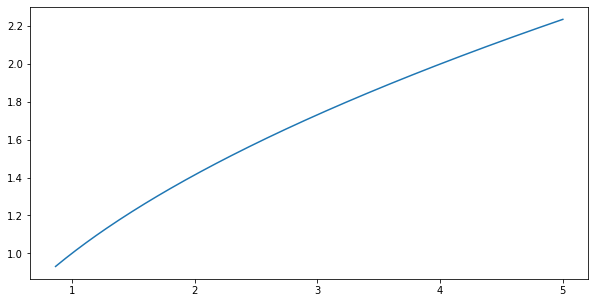

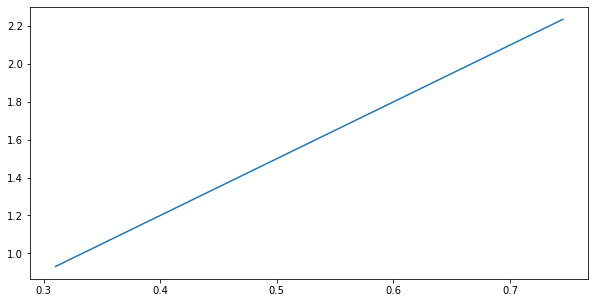

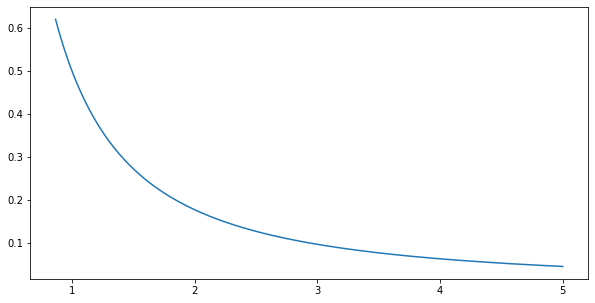

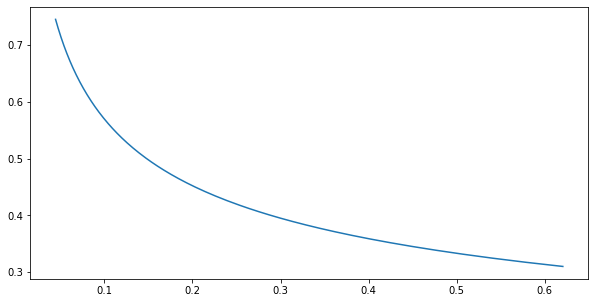

In [50]:
# Plot L x Y1
fig = plt.subplots(figsize = (10,5))
plt.plot(L_sim,Y1_sim)
plt.show()

# Plot K x Y1
fig = plt.subplots(figsize = (10,5))
plt.plot(K_sim,Y1_sim)
plt.show()

# Plot L x c1
fig = plt.subplots(figsize = (10,5))
plt.plot(L_sim,c1_sim)
plt.show()

# Plot K x c1
fig = plt.subplots(figsize = (10,5))
plt.plot(c1_sim,K_sim)
plt.show()


The rest of shock dynamics, I let with you as exercise. Also, I am going to upload a version for the equilibrium in Excel. But Python (or any programming language) is much nicer :) 